In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/TOTALSA (2).csv")

In [ ]:
df

,DATE,TOTALSA
0,1976-01-01,12.814
1,1976-02-01,13.340
2,1976-03-01,13.378
3,1976-04-01,13.223
4,1976-05-01,12.962
...,...,...
568,2023-05-01,16.079
569,2023-06-01,16.602
570,2023-07-01,16.442
571,2023-08-01,15.898


In [ ]:
df.columns = ["Date","Sales"]

In [ ]:
# convert the date
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# sort the values
df.sort_values(by='Date', inplace=True)

# set the index
df.set_index('Date', inplace=True)

In [ ]:
df

,Sales
Date,
1976-01-01,12.814
1976-02-01,13.340
1976-03-01,13.378
1976-04-01,13.223
1976-05-01,12.962
...,...
2023-05-01,16.079
2023-06-01,16.602
2023-07-01,16.442


In [ ]:
df.columns

Index(['Sales'], dtype='object')

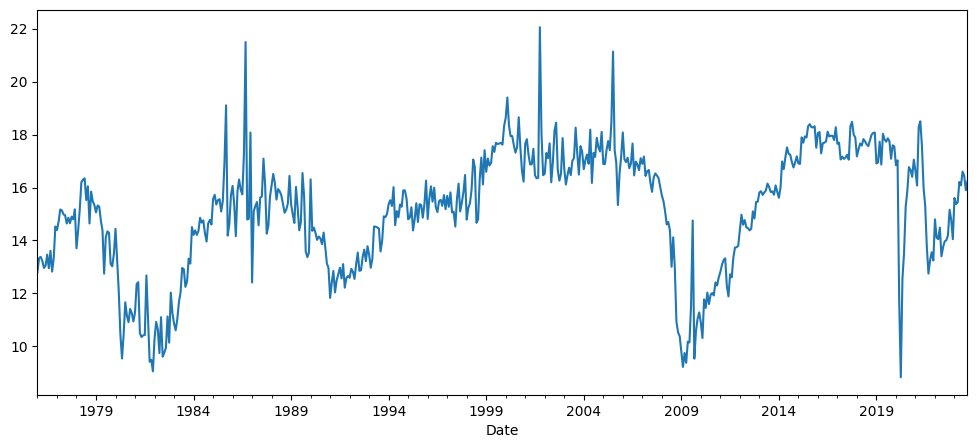

In [ ]:
df['Sales'].plot(figsize=(12,5));

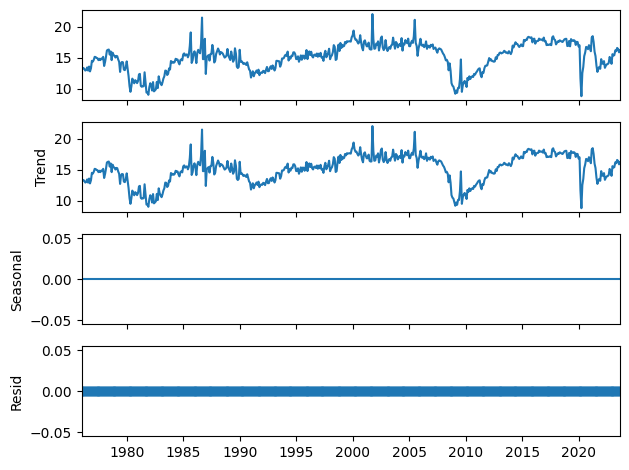

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(df,model="additive",period=1)
decompose_data.plot();

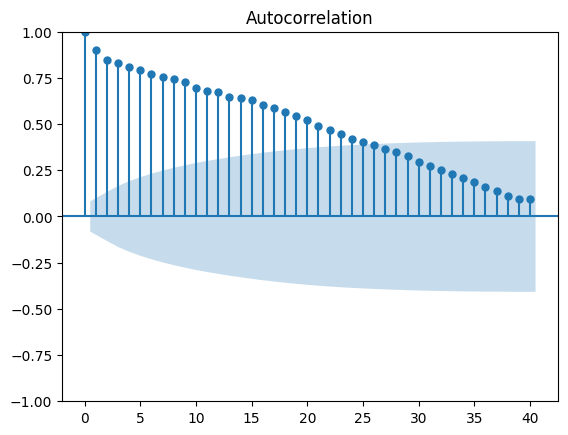

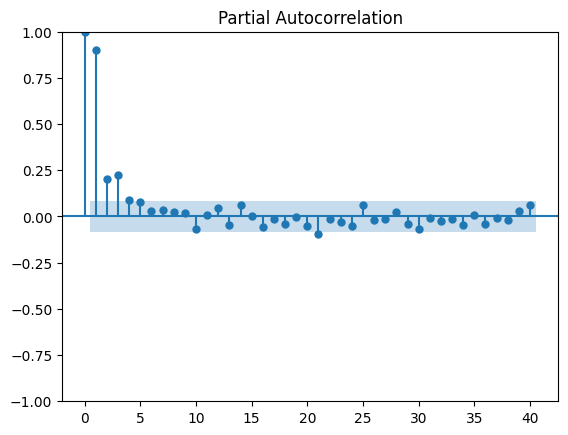

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Sales'], lags=40);
plot_pacf(df['Sales'], lags=40);


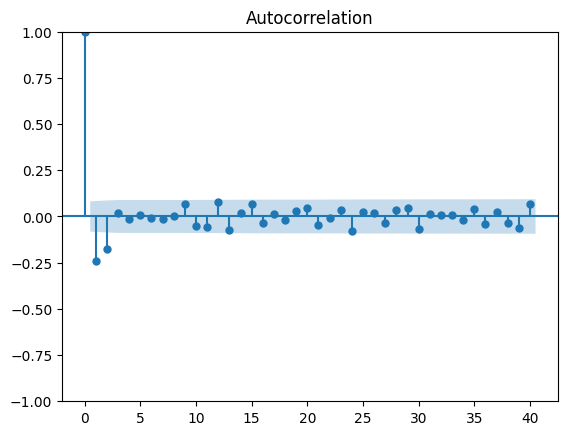

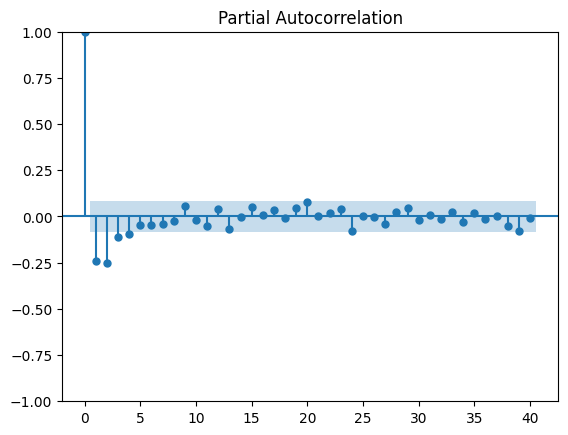

In [ ]:
plot_acf(df['Sales'].diff().dropna(), lags=40);
plot_pacf(df['Sales'].diff().dropna(), lags=40);

Test Statistic                  -2.837994
p-value                          0.053048
lags used                        4.000000
number of observations used    568.000000
dtype: float64
critical value 1% : -3.4419153151868147
critical value 5% : -2.8666418984730146
critical value 10% : -2.569487157434041


<Axes: xlabel='Date', ylabel='Sales'>

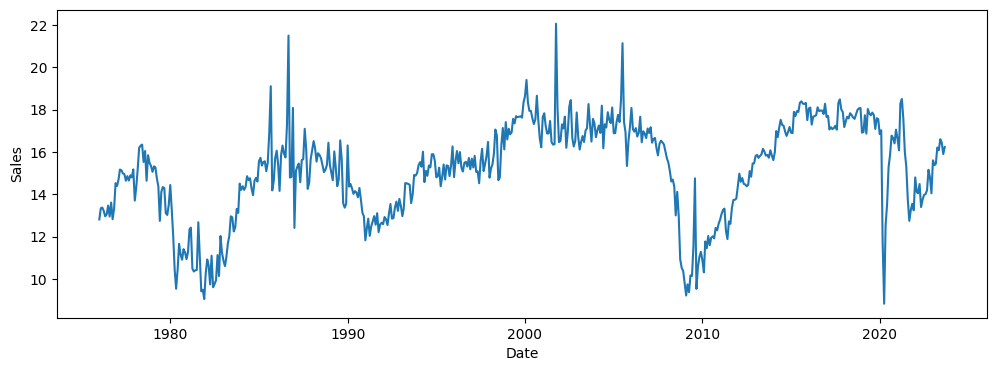

In [ ]:
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import matplotlib.pyplot as plt

adfTest = adfuller(df["Sales"],autolag='AIC')
stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','lags used','number of observations used'])
print(stats)

for key,values in adfTest[4].items():
  print('critical value',key,":",values)

plt.figure(figsize=(12,4))
sns.lineplot(data=df,x=df.index,y="Sales")

Test Statistic                -1.630548e+01
p-value                        3.234689e-29
lags used                      3.000000e+00
number of observations used    5.680000e+02
dtype: float64
critical value 1% : -3.4419153151868147
critical value 5% : -2.8666418984730146
critical value 10% : -2.569487157434041


<Axes: xlabel='Date', ylabel='Sales'>

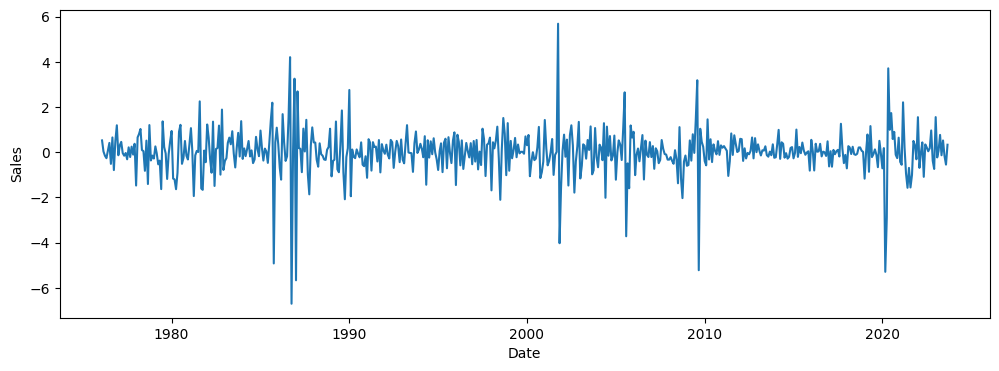

In [ ]:
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import matplotlib.pyplot as plt

adfTest = adfuller(df["Sales"].diff().dropna(),autolag='AIC')
stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','lags used','number of observations used'])
print(stats)

for key,values in adfTest[4].items():
  print('critical value',key,":",values)

plt.figure(figsize=(12,4))
sns.lineplot(data=df,x=df.index,y=df["Sales"].diff())

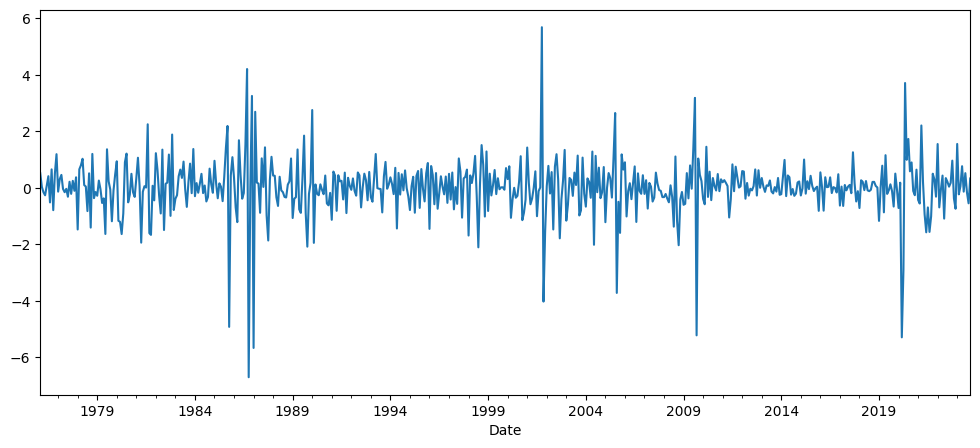

In [ ]:
df['Sales'].diff().dropna().plot(figsize=(12,5));

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fitting ARIMA(1,1,1) model
arima_model = ARIMA(df['Sales'], order=(1,0,15)) #(p,d,q) #acf,pacf plot
# arima_model = ARIMA(df['Sales'], order=(1,4,15)) #adf test
# arima_model = ARIMA(df['Sales'].diff().dropna(), order=(1,1,1)) #acf pacf plot
arima_result = arima_model.fit()
print(arima_result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  573
Model:                ARIMA(1, 0, 15)   Log Likelihood                -761.365
Date:                Fri, 03 Nov 2023   AIC                           1558.730
Time:                        04:52:24   BIC                           1637.046
Sample:                    01-01-1976   HQIC                          1589.279
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1003      0.840     17.973      0.000      13.454      16.747
ar.L1          0.9683      0.017     57.050      0.000       0.935       1.002
ma.L1         -0.3294      0.027    -12.279      0.0

In [ ]:
prediction = arima_result.predict(start=0, end=600)

In [ ]:
len(prediction)

601

In [ ]:
rdf = df['Sales'].copy()
# rdf = df['Sales'].diff().dropna().copy()
rdf = rdf.to_frame()

In [ ]:
rdf = rdf.reset_index().drop(['Date'], axis=1)

In [ ]:
rdf.index

RangeIndex(start=0, stop=573, step=1)

In [ ]:
import pandas as pd

# Your original DatetimeIndex
original_index = pd.date_range(start='1976-01-01', periods=601, freq='MS')

# Create a RangeIndex with the desired properties
desired_range_index = pd.RangeIndex(start=0, stop=601, step=1)

# Verify the result
print(desired_range_index)

RangeIndex(start=0, stop=601, step=1)


In [ ]:
prediction.index = desired_range_index

In [ ]:
prediction.index

RangeIndex(start=0, stop=601, step=1)

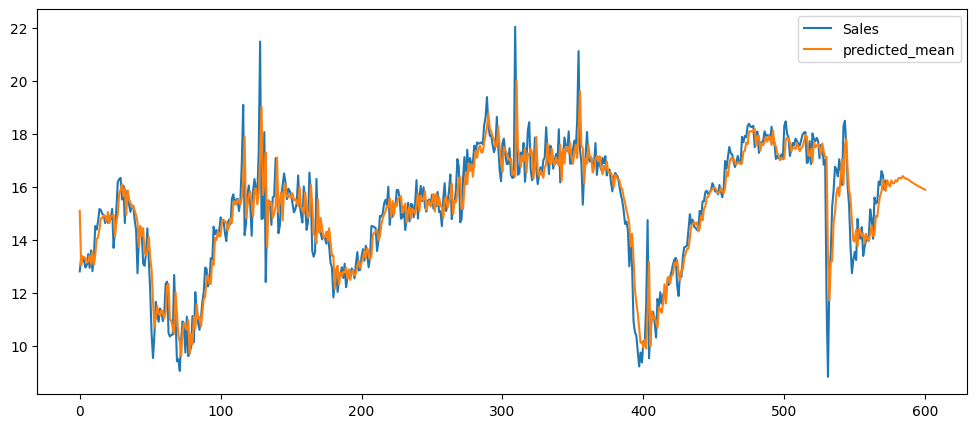

In [ ]:
pd.merge(rdf, prediction, how='outer', left_index=True, right_index=True).plot(figsize=(12,5));

In [ ]:
prediction[573:]

573    16.262012
574    16.092026
575    16.026730
576    16.251767
577    16.144890
578    16.145449
579    16.259334
580    16.203719
581    16.332675
582    16.350862
583    16.322507
584    16.416384
585    16.362656
586    16.315993
587    16.315944
588    16.277420
589    16.240117
590    16.203997
591    16.169021
592    16.135153
593    16.102359
594    16.070604
595    16.039856
596    16.010082
597    15.981251
598    15.953334
599    15.926302
600    15.900126
Name: predicted_mean, dtype: float64